## Single Layer Perceptron

### Setting up the libraries

In [43]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense, Activation
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [38]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

### Anatomy

These are grayscale images and has a fixed size of 28x28 pixels. So, each image can be represented as a matrix of pixel values with dimensions 28x28, where each pixel value typically ranges from __0 to 255__ (0 being black and 255 being white in grayscale images)

Total data in x_train: 60000 and in x_test: 60000
Shape of Matrix: (28, 28)


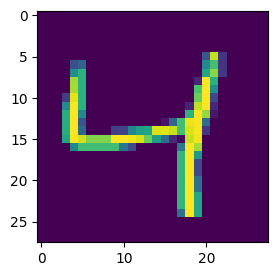

In [39]:
print(f"Total data in x_train: {len(x_train)} and in x_test: {len(x_train)}")

# Matrix of pixels shape: 28*28
print(f"Shape of Matrix: {x_train[0].shape}")

plt.figure(figsize=(3,3))
plt.imshow(x_train[2])
plt.show()

In [40]:
# Normalize the data, meaning, turning the values into the range of [0, 1]
norm_x_train = x_train/255
norm_x_test = x_test/255

# Flattening the data to a 1D array
x_train_flatten = norm_x_train.reshape(-1, 28*28)
x_test_flatten = norm_x_test.reshape(-1, 28*28) 

1. input_shape defines the shape of the input data that will be fed into the neural network. Here, __784 represents the total number of pixels in each image__ of the MNIST dataset, which is a flattened version of the original 28x28 images (28 * 28 = 784). The comma after 784 indicates that it's a tuple with one element. <br><br>
2. Sparse categorical crossentropy is suitable for integer-encoded target labels

In [41]:
input_shape = (784,)

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=input_shape, activation='sigmoid')
])

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

model.fit(x_train_flatten, y_train, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 389us/step - accuracy: 0.8153 - loss: 0.7095
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 383us/step - accuracy: 0.9148 - loss: 0.3071
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 380us/step - accuracy: 0.9211 - loss: 0.2824
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 388us/step - accuracy: 0.9256 - loss: 0.2685
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 376us/step - accuracy: 0.9269 - loss: 0.2599


In [42]:
model.evaluate(x_test_flatten, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - accuracy: 0.9133 - loss: 0.3030


[0.2674286663532257, 0.9258000254631042]

## Multi-Layer Perceptron

In [44]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

Reason to convert the pixel values into float is because for the model to perform better calculations, it ensures the compatibility with the models' computations adn operations

In [46]:
# Converting the Pixels into floating points
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

# Normalizing the Image Pixels from [0, 255] to [0, 1]
grayscale = 255
X_train /= grayscale
X_test /= grayscale

In [50]:
print(f"Feature Matrix: {X_train.shape}")
print(f"Target Matrix: {X_test.shape}")
print(f"Feature Matrix: {y_train.shape}")
print(f"Target Matrix: {y_test.shape}")

# Size of every Image is 28*28
print(f"Shape of Matrix: {X_train[0].shape}")

Feature Matrix: (60000, 28, 28)
Target Matrix: (10000, 28, 28)
Feature Matrix: (60000,)
Target Matrix: (10000,)
Shape of Matrix: (28, 28)


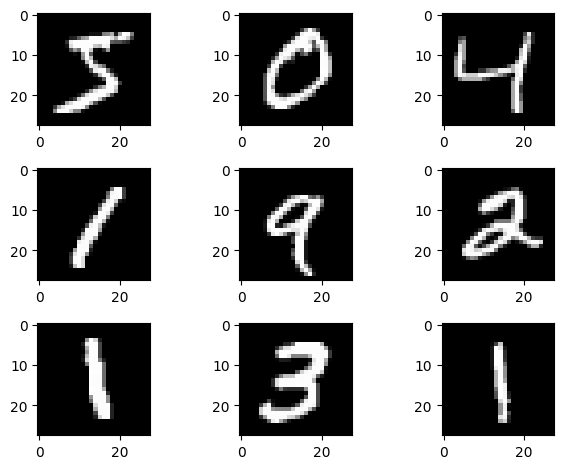

In [69]:
fig, ax = plt.subplots(3,3); k = 0
for i in range(3):
    for j in range(3):
        ax[i][j].imshow(X_train[k], cmap = 'gray')
        k += 1
        
plt.tight_layout()
plt.show()

In [62]:
model = keras.Sequential([
    
    # Reshape the input into 28*28 or it can be (784, )
    Flatten(input_shape=(28, 28)),
    
    # Dense Layer
    Dense(256, activation='relu'),
    
    # Dense Layer
    Dense(256, activation='relu'),
    
    # Output Layer
    Dense(10, activation='softmax')
])

In [63]:
model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

# Default Batch Size is 32
model.fit(X_train, y_train, epochs = 10, batch_size=2000, validation_split=0.2)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5678 - loss: 1.5370 - val_accuracy: 0.9016 - val_loss: 0.3412
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9043 - loss: 0.3250 - val_accuracy: 0.9286 - val_loss: 0.2443
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9307 - loss: 0.2396 - val_accuracy: 0.9440 - val_loss: 0.1991
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9458 - loss: 0.1913 - val_accuracy: 0.9515 - val_loss: 0.1705
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9566 - loss: 0.1514 - val_accuracy: 0.9563 - val_loss: 0.1485
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9640 - loss: 0.1252 - val_accuracy: 0.9608 - val_loss: 0.1342
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9707 - loss: 0.1091 - val_accuracy: 0.9640 - val_loss: 0.1218
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9743 - loss: 0.0922 - val_accuracy: 0.9663 - val_loss

In [64]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.9678 - loss: 0.1099
test loss, test acc: [0.09626654535531998, 0.972000002861023]


[Continue?](https://www.geeksforgeeks.org/deep-neural-net-with-forward-and-back-propagation-from-scratch-python/?ref=lbp)